# Import libraries

In [8]:
%matplotlib inline
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import requests
import descartes
import calendar
import seaborn as sns
import matplotlib

# Import data

In [9]:
# Loading data (https://www.nti.org/analysis/articles/cns-north-korea-missile-test-database/). Encoding problem solved with 'unicode_escape'.
df = pd.read_csv('data/north_korea_missile_test_database.csv', encoding= 'unicode_escape', index_col= "F1")
df = df.drop(columns=['Launch Agency/Authority', 'Other Name', 'Additional Information', 'Source(s)'])

In [34]:
df.sort_index()

,Date,Date Entered/Updated,Launch Time (UTC),Missile Name,Missile Type,Facility Name,Facility Location,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Test Outcome,Year,Month_Number,Month,# of Test,YYYYMM,Frequencies
F1,,,,,,,,,,,,,,,,,,,,
1,1984-04-09,2016-12-23,NaN,Scud-B,SRBM,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",40.849997,129.666664,Unknown,0.0,0.0,Confirmed,Success,1984,4,Apr,1,198404,17
2,1984-04-09,2016-12-23,NaN,Scud-B,SRBM,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",40.849997,129.666664,Unknown,0.0,0.0,Confirmed,Success,1984,4,Apr,1,198404,17
3,1984-04-09,2016-12-23,NaN,Scud-B,SRBM,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",40.849997,129.666664,Unknown,200.0,0.0,Confirmed,Success,1984,4,Apr,1,198404,17
4,1984-09-01,2016-12-23,NaN,Scud-B,SRBM,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",40.849997,129.666664,Unknown,0.0,0.0,Confirmed,Failure,1984,9,Sep,1,198409,17
5,1984-09-01,2016-12-23,NaN,Scud-B,SRBM,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",40.849997,129.666664,Unknown,200.0,0.0,Confirmed,Failure,1984,9,Sep,1,198409,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2023-03-15,2023-03-23,10:09:00 PM,Hwasong-17,ICBM,Pyongyang International Airport,"Pyongyang, North Korea",39.200159,125.673256,Sea of Japan or East Sea,6000.0,1000.0,Confirmed,Success,2023,3,Mar,1,202303,18
242,2023-03-19,2023-03-23,2:05:00 AM,Silo-based KN-23,SRBM,Sohae Satellite Launching Station,"Cholsan County, North Pyongan Province",39.659600,124.705700,Sea of Japan or East Sea,50.0,800.0,Confirmed,Success,2023,3,Mar,1,202303,11
243,2023-03-26,2023-04-19,10:47:00 PM,Hwasong-11A (KN-23),SRBM,Chunghwa County,"Chunghwa County, North Hwanghae",38.875000,125.926000,Sea of Japan or East Sea,50.0,350.0,Confirmed,Success,2023,3,Mar,1,202303,5


# Cleaning data & formatting data

In [12]:
# First data cleaning. Changing formats (str to int or float)
df['Distance Travelled'] = df['Distance Travelled'].apply(lambda x: x.replace('km', '') if isinstance(x, str) else x)
# And then, convert 'Unkown' values to numerics.
df['Distance Travelled'] = df['Distance Travelled'].replace('Unknown', 'NaN') 
# Finally, I can change it to numeric pandas table.
df['Distance Travelled'] = pd.to_numeric(df['Distance Travelled'], errors='coerce').fillna(0)

In [13]:
# Changing 'location' data
df['Facility Latitude'] = pd.to_numeric(df['Facility Latitude'], errors='coerce')
df['Facility Longitude'] = pd.to_numeric(df['Facility Longitude'], errors='coerce')
# For 'Apogee', I need to remove 'km' from the data first.
df['Apogee'] = df['Apogee'].apply(lambda x: x.replace('km', '') if isinstance(x, str) else x)
# And then, convert 'Unkown' values to numerics.
df['Apogee'] = df['Apogee'].replace('Unknown', '0') 
# Finally, I can change it to numeric pandas table.
df['Apogee'] = pd.to_numeric(df['Apogee'], errors='coerce').fillna(0)
# Same as the 'Apogee', changing 'Distance Travelled' column in pandas series for plotting better.
df['Distance Travelled'] = df['Distance Travelled'].apply(lambda x: x.replace('km', '') if isinstance(x, str) else x)
df['Distance Travelled'] = df['Distance Travelled'].replace('Unknown', 'NaN') 
# Come back to this line after trying to map later.
df['Distance Travelled'] = pd.to_numeric(df['Distance Travelled'], errors='coerce')
# Date changes
df['Date'] = pd.to_datetime(df['Date'])
# Date Entered/Updated changes
df['Date Entered/Updated'] = pd.to_datetime(df['Date Entered/Updated'])
# Creating a new column for separating the year values in numeric format.
df['Year'] = df['Date'].dt.year
# Another column for changing number values to string values.
df['Month_Number'] = df['Date'].dt.month
# Another column for separating values to month specifically.
df['Month'] = df['Month_Number'].apply(lambda x: calendar.month_abbr[x])
# Another column for counting test numbers.
df["# of Test"] = 1
# Simplifying the Year/Month format.
df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')
df.head(1)

,Date,Date Entered/Updated,Launch Time (UTC),Missile Name,Missile Type,Facility Name,Facility Location,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Test Outcome,Year,Month_Number,Month,# of Test,YYYYMM
F1,,,,,,,,,,,,,,,,,,,
1,1984-04-09,2016-12-23,NaN,Scud-B,SRBM,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",40.849997,129.666664,Unknown,0.0,0.0,Confirmed,Success,1984,4,Apr,1,198404


# First plot: mapbox of the testing facility locations (Overview)

In [14]:
test_frequencies = df['Facility Name'].value_counts()
df['Frequencies'] = df['Facility Name'].map(test_frequencies)
sorted_df = df.sort_values(by='Frequencies', ascending=False)

# Create the scatter map plot
map_fig2 = px.scatter_mapbox(sorted_df, lat='Facility Latitude', lon='Facility Longitude',
                             color='Facility Name', size='Frequencies',
                             zoom=6, center={'lat': 39.17180415583127, 'lon': 126.551952046587},
                             width=1000, height=700, title='DPRK Missile Facility Locations')

map_fig2.update_layout(mapbox_style="carto-positron", title_font_size=25, title_font_family="Courier New")
map_fig2.update_layout(margin_autoexpand=True)

# Modify the legend position
map_fig2.update_layout(title=dict(x=0.5, xanchor='center'))
map_fig2.update_layout(margin=dict(t=45, l=0, r=0, b=5))
# Display the scatter map plot
map_fig2.show()

# Second plot: Number of missile tests by timeline

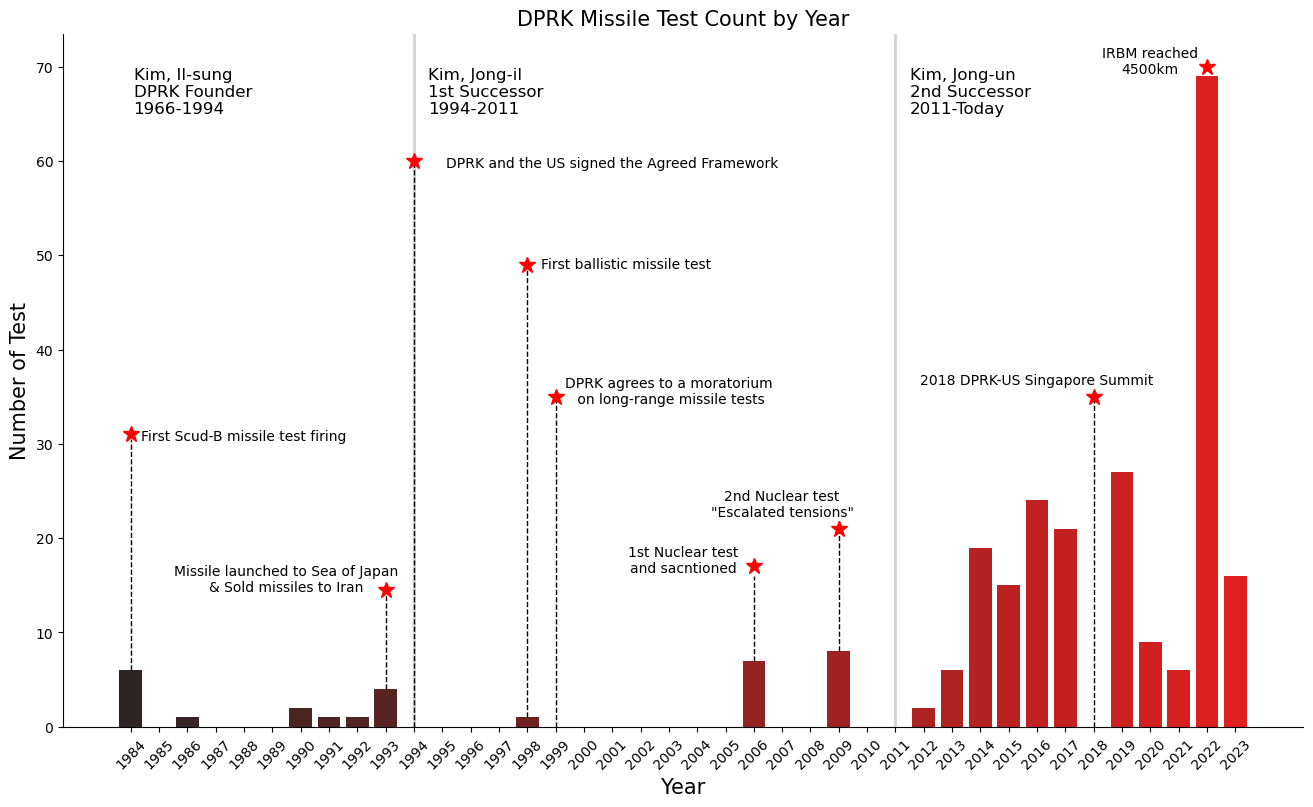

In [15]:
grouped_total_num = df.groupby('Year').sum(numeric_only=True).reset_index()

# Create a range of years from the minimum to maximum years in the data
year_chart = range(df['Year'].min(), df['Year'].max() + 1)

# Create a DataFrame with all years
year_chart_df = pd.DataFrame({'Year': year_chart})

# Merge the all_years_df with the grouped DataFrame to fill missing years with 0 test counts
merged_df = pd.merge(year_chart_df, grouped_total_num, how='left', on='Year')
merged_df['# of Test'] = merged_df['# of Test'].fillna(0)

# Create a gradient color palette using seaborn's light_palette()
n_colors = len(merged_df)  # Number of colors in the palette (one for each year)
gradient_palette = sns.dark_palette("red", n_colors=n_colors)

# Create the bar chart with the gradient color palette
plt.figure(figsize=(16, 9))
sns.barplot(x='Year', y='# of Test', data=merged_df, palette=gradient_palette)

# Customize the plot
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.xticks(rotation=45)

plt.axvline(10, 0, 15, color='lightgray', linestyle='-', linewidth='2')
plt.axvline(27, 0, 15, color='lightgray', linestyle='-', linewidth='2')

plt.text(0.1, 65,'Kim, Il-sung\nDPRK Founder\n1966-1994', fontsize=12, color='black')
plt.text(10.5, 65, 'Kim, Jong-il\n1st Successor\n1994-2011', fontsize=12, color='black')
plt.text(27.5, 65, 'Kim, Jong-un\n2nd Successor\n2011-Today', fontsize=12, color='black')

# Set x-axis label and title
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Test', fontsize=15)
plt.title('DPRK Missile Test Count by Year', fontsize=15)

#First comment & line descriptions
x1 = 0
y1 = merged_df.loc[0, '# of Test']
comment1 = 'First Scud-B missile test firing'
line_length1 = 24.5  # Extend the line by 5 points
plt.text(x1 + 4, y1 + 24, comment1, ha='center', va='bottom')
plt.plot([x1, x1], [y1, y1 + line_length1], color='black', linewidth=1, linestyle='--')
#First star
star_x1 = x1
star_y1 = y1 + 25  # Adjust the vertical position of the star
plt.plot(star_x1, star_y1, marker='*', color='red', markersize=12)

#Second comment & line descriptions
x2 = 9
y2 = merged_df.loc[9, '# of Test']
comment2 = 'Missile launched to Sea of Japan\n& Sold missiles to Iran'
#x_line2 = 14
line_length2 = 10
plt.text(x2 - 3.5, y2 + 10, comment2, ha='center', va='bottom')
plt.plot([x2, x2], [y2, y2 + line_length2], color='black', linewidth=1, linestyle='--')
line_length2 = 24.5  # Extend the line by 5 points
#Second star
star_x2 = x2
star_y2 = y2 + 10.5  # Adjust the vertical position of the star
plt.plot(star_x2, star_y2, marker='*', color='red', markersize=12)

#Third comment & line descriptions
x3 = 10
y3 = merged_df.loc[10, '# of Test']
comment3 = 'DPRK and the US signed the Agreed Framework'
#x_line3 = 40
line_length3 = 60
plt.text(x3 + 7, y3 + 59, comment3, ha='center', va='bottom')
plt.plot([x3, x3], [y3, y3 + line_length3], color='black', linewidth=1, linestyle='--')

#Third star
star_x3 = x3
star_y3 = y3 + 60  # Adjust the vertical position of the star
plt.plot(star_x3, star_y3, marker='*', color='red', markersize=12)

#Forth comment & line descriptions
x4 = 14
y4 = merged_df.loc[14, '# of Test']
comment4 = 'First ballistic missile test'
#x_line3 = 40
line_length4 = 48
plt.text(x4 + 3.5, y4 + 47.3, comment4, ha='center', va='bottom')
plt.plot([x4, x4], [y4, y4 + line_length4], color='black', linewidth=1, linestyle='--')
line_length4 = 48.5  # Extend the line by 5 points
#Fourth star
star_x4 = x4
star_y4 = y4 + 48  # Adjust the vertical position of the star
plt.plot(star_x4, star_y4, marker='*', color='red', markersize=12)

#Fifth comment & line descriptions
x5 = 15
y5 = merged_df.loc[15, '# of Test']
comment5 = 'DPRK agrees to a moratorium\n on long-range missile tests'
line_length5 = 35
plt.text(x5 + 4, y5 + 34, comment5, ha='center', va='bottom')
plt.plot([x5, x5], [y5, y5 + line_length5], color='black', linewidth=1, linestyle='--')
#Fourth star
star_x5 = x5
star_y5 = y5 + 35  # Adjust the vertical position of the star
plt.plot(star_x5, star_y5, marker='*', color='red', markersize=12)

#Sixth comment & line descriptions
x6 = 34
y6 = merged_df.loc[34, '# of Test']
comment6 = '2018 DPRK-US Singapore Summit'
line_length6 = 35
plt.text(x6 - 2, y6 + 36, comment6, ha='center', va='bottom')
plt.plot([x6, x6], [y6, y6 + line_length6], color='black', linewidth=1, linestyle='--')
#Fourth star
star_x6 = x6
star_y6 = y6 + 35  # Adjust the vertical position of the star
plt.plot(star_x6, star_y6, marker='*', color='red', markersize=12)

#Seventh comment & line descriptions
x7 = 38
y7 = merged_df.loc[38, '# of Test']
comment7 = 'IRBM reached\n4500km'
line_length7 = 30
plt.text(x7 - 2, y7 + 0, comment7, ha='center', va='bottom')
#plt.plot([x7, x7], [y7, y7 + line_length7], color='black', linewidth=1, linestyle='--')
#Fourth star
star_x7 = x7
star_y7 = y7 + 1  # Adjust the vertical position of the star
plt.plot(star_x7, star_y7, marker='*', color='red', markersize=12)

#Eight comment & line descriptions
x8 = 22
y8 = merged_df.loc[22, '# of Test']
comment8 = '1st Nuclear test\nand sacntioned'
line_length8 = 9
plt.text(x8 - 2.5, y8 + 9, comment8, ha='center', va='bottom')
plt.plot([x8, x8], [y8, y8 + line_length8], color='black', linewidth=1, linestyle='--')
#Eight star
star_x8 = x8
star_y8 = y8 + 10  # Adjust the vertical position of the star
plt.plot(star_x8, star_y8, marker='*', color='red', markersize=12)

#Nineth comment & line descriptions
x9 = 25
y9 = merged_df.loc[25, '# of Test']
comment9 = '2nd Nuclear test\n"Escalated tensions"'
line_length9 = 14
plt.text(x9 - 2, y9 + 14, comment9, ha='center', va='bottom')
plt.plot([x9, x9], [y9, y9 + line_length9], color='black', linewidth=1, linestyle='--')
#Nineth star
star_x9 = x9
star_y9 = y9 + 13  # Adjust the vertical position of the star
plt.plot(star_x9, star_y9, marker='*', color='red', markersize=12)

# Display the bar chart
#plt.tight_layout()
plt.show()

# Third plot: Number of successes and failures by facility names

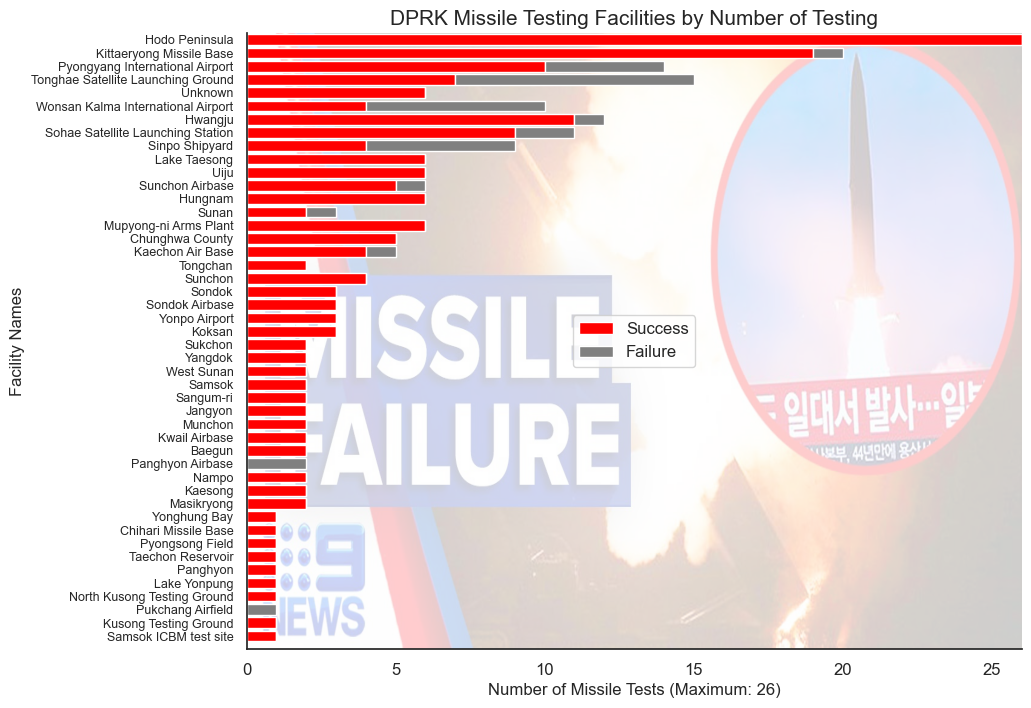

In [50]:
# Counting of total number
test_frequencies = df['Facility Name'].value_counts()
facility_names_reversed = test_frequencies.index[::-1]
facility_counts_reversed = test_frequencies.values[::-1]

# Counting Success and Failure numbers by facility name
facility_success = df.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Success').sum())
facility_failure = df.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Failure').sum())


success_counts = facility_success.reindex(facility_names_reversed).values
failure_counts = facility_failure.reindex(facility_names_reversed).values

# Determine the figure size
plt.figure(figsize=(10, 8))
# Chart layout - I used [::-1] because otherwise, the highest number goes to the bottom.

# Configuring the bar colors
success_color = 'red' 
failure_color = 'gray' 
# Starting to define what goes into the chart
bar_positions = np.arange(len(facility_names_reversed))
# Setting the bar


plt.barh(bar_positions, success_counts, color=success_color)
plt.barh(bar_positions, failure_counts, left=success_counts, color=failure_color)
# Additional visualization
plt.yticks(bar_positions, facility_names_reversed)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=9)
plt.xlabel('Number of Missile Tests (Maximum: 26)', size=12)
plt.ylabel('Facility Names', size=12)
plt.title('DPRK Missile Testing Facilities by Number of Testing', size=15)
plt.xticks(rotation=0)
# Set the legend
legend_font_size = 12
plt.legend(['Success', 'Failure'], loc='center', prop={'size': legend_font_size})

#for i, v in enumerate(facility_counts_reversed):
#    plt.text(v, i, str(v), color='black', va='center', size=9)
    
# Additional chart configuration
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.ylim(bar_positions[0]-1, bar_positions[-1]+0.5)

# Add the watermark background

watermark = plt.imread('img/missile_failure_background.jpeg') 
x_limits = plt.xlim()
y_limits = plt.ylim()
extent = [*x_limits, *y_limits]

plt.imshow(watermark, extent=extent, aspect='auto', alpha=0.2)

#plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'DPRK missile traveled distance expansions by timeline')

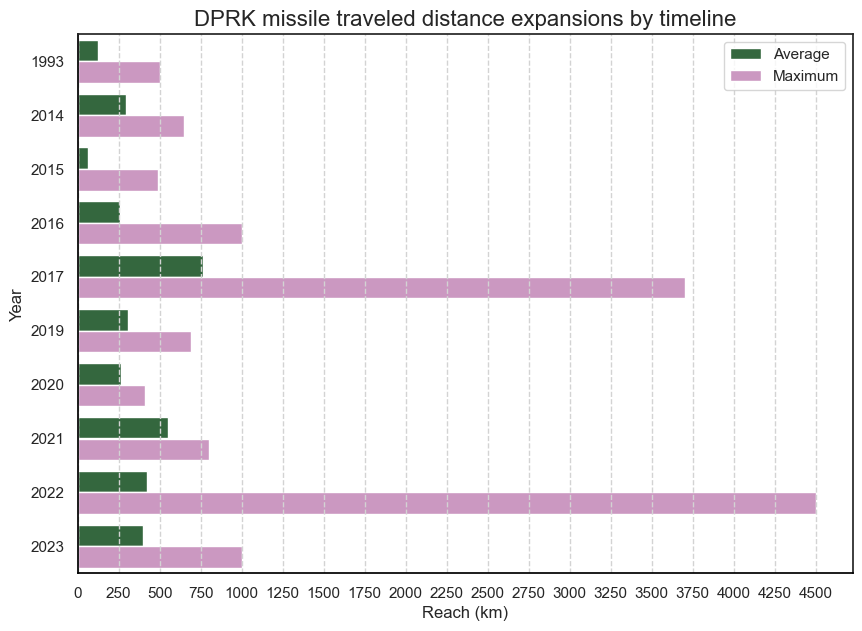

In [46]:
# This chart requires two different values (max & mean). Therefore, the following lines defines both max range and mean range.
df_distance = df[['Year','Distance Travelled']]
grouped_distance = df_distance.groupby('Year')
df_range_max = grouped_distance.max().reset_index()
df_range_max = df_range_max.dropna()
df_range_max.rename(columns = {"Distance Travelled": "Reach (km)"}, inplace=True)
df_range_max['Category'] = "Maximum"
# Here starts mean range
df_distance = df[['Year','Distance Travelled']]
grouped_distance = df_distance.groupby('Year')
df_range_mean = grouped_distance.mean().reset_index()
df_range_mean = df_range_mean.dropna()
df_range_mean.rename(columns = {"Distance Travelled": "Reach (km)"}, inplace=True)
df_range_mean['Category'] = "Average"
# Now, concatenate two data (max & mean), so it can be plotted together.
df_reach = pd.concat([df_range_mean,df_range_max])
df_reach = df_reach[df_reach['Reach (km)'] != 0.0]
# Creating a figure
fig = plt.figure(figsize=(10, 7))
# Creating a plot
ax1 = sns.barplot(x='Reach (km)', y='Year', hue="Category", data=df_reach, orient="h", palette="cubehelix")

ax1 = sns.set_theme(style="white")
#ax1 = plt.gca().spines['right'].set_visible(False)
# ax1 = plt.gca().spines['top'].set_visible(True)
# ax1 = plt.gca().spines['left'].set_visible(True)
# ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.gca().spines['left'].set_color('black')
ax1 = plt.gca().spines['bottom'].set_color('black')
# xticks by 250 km
xticks = np.arange(0, df_reach['Reach (km)'].max()+250, 250)
plt.xticks(xticks, xticks.astype(int))
# xticks lines
for xtick in xticks:
    plt.axvline(xtick, -1, 5, color='lightgray', linestyle='--', linewidth='1')
# ax1 = plt.text(312, 5.3, 'Seoul\n(312km)', fontsize=10, color='red', horizontalalignment='center')
# ax1 = plt.text(595, 5.3, 'Busan\n(590km)', fontsize=10, color='red', horizontalalignment='center')
# ax1 = plt.text(988, 5.3, 'Beijing\n(994km)', fontsize=10, color='red', horizontalalignment='center')
# ax1 = plt.text(1040, 5.3, 'Tokyo\n(1040km)', fontsize=10, color='red', horizontalalignment='center')

ax1 = plt.legend(loc='upper right')

plt.title('DPRK missile traveled distance expansions by timeline', fontsize = 16, loc='center')

In [20]:
df['Landing Location'].value_counts()

Sea of Japan or East Sea                                      196
Unknown                                                        19
Yellow Sea or West Sea                                         10
Pacific Ocean                                                   5
330km east of Hachinohe and 4000 km out into Pacific Ocean      1
Name: Landing Location, dtype: int64

In [23]:
landing_location_counts = df['Landing Location'].value_counts().reset_index()
landing_location_counts.columns = ['Location', 'Count']

landing_locations = {
    'Sea of Japan or East Sea': (39.955235648894956, 134.61977359260942),
    'Yellow Sea or West Sea': (37.59154703499678, 124.86670024925259),
    'Pacific Ocean': (32.03899252565651, 175.45833648092025),  # Replace with the actual coordinates for 'Pacific Ocean'
    '330km east of Hachinohe and 4000 km out into Pacific Ocean': (41.27280362125239, 148.20008702447393),
    'Unknown' : (0,0)
}

df_locations = pd.DataFrame(landing_locations.items(), columns=['Location', 'Coordinates'])
df_locations = pd.merge(df_locations, landing_location_counts, on='Location', how='left')
df_locations[['Latitude', 'Longitude']] = pd.DataFrame(df_locations['Coordinates'].tolist(), index=df_locations.index)

map_fig2 = px.scatter_mapbox(df_locations, lat='Latitude', lon='Longitude', hover_name='Location',
                             color='Location', size='Count', size_max=30,  # Adjust the size_max value as needed
                             zoom=2.7, center={'lat': 37.10179958267497, 'lon': 149.44271388582095},
                             width=1000, height=500, title='DPRK Missile Landing Locations')

map_fig2.update_layout(title=dict(x=0.5, xanchor='center'))
map_fig2.update_layout(mapbox_style="carto-darkmatter", title_font_size=25, title_font_family="Courier New")
map_fig2.update_layout(margin=dict(t=45, l=0, r=0, b=0))  # Set all margins to 0

map_fig2.show()

In [362]:
df_locations.head(10)

,Location,Coordinates,Count,Latitude,Longitude
0,Sea of Japan or East Sea,"(39.955235648894956, 134.61977359260942)",196,39.955236,134.619774
1,Yellow Sea or West Sea,"(37.59154703499678, 124.86670024925259)",10,37.591547,124.866700
2,Pacific Ocean,"(32.03899252565651, 175.45833648092025)",5,32.038993,175.458336
3,330km east of Hachinohe and 4000 km out into P...,"(41.27280362125239, 148.20008702447393)",1,41.272804,148.200087
4,Unknown,"(0, 0)",19,0.000000,0.000000


In [24]:
# Creating new columns
landing_location_counts = df['Landing Location'].value_counts().reset_index()
landing_location_counts.columns = ['Location', 'Count']
# Define the list of landing locations - Grid coordinances are from Google Maps.
landing_locations = {
    'Sea of Japan or East Sea': (39.955235648894956, 134.61977359260942),
    'Yellow Sea or West Sea': (37.59154703499678, 124.86670024925259),
    'Pacific Ocean': (32.03899252565651, 175.45833648092025), 
    '330km east of Hachinohe and 4000 km out into Pacific Ocean': (41.27280362125239, 148.20008702447393),
    'Unknown': (0, 0)
}
# making a new dataframe for specifically this map. Columns includes Location, Cordinates (where to plot), Count, Lat/Lon.
df_locations = pd.DataFrame(landing_locations.items(), columns=['Location', 'Coordinates'])
df_locations = pd.merge(df_locations, landing_location_counts, on='Location', how='left')
df_locations[['Latitude', 'Longitude']] = pd.DataFrame(df_locations['Coordinates'].tolist(), index=df_locations.index)

# Now, create a map
fig = px.density_mapbox(df_locations, lat='Latitude', lon='Longitude', z='Count',
                        radius=35, center={'lat': 37.10179958267497, 'lon': 149.44271388582095},
                        zoom=2.7, mapbox_style="stamen-terrain", width=1000, height=500,
                        title='DPRK Missile Landing Locations Heatmap')

fig.update_layout(title=dict(x=0.5, xanchor='center'))
fig.update_layout(coloraxis_colorbar=dict(title='Count'))
fig.update_layout(margin=dict(t=45, l=0, r=0, b=0))  # Set all margins to 0

fig.show()

In [25]:
import plotly.express as px

landing_location_counts = df['Landing Location'].value_counts().reset_index()
landing_location_counts.columns = ['Location', 'Count']

landing_locations = {
    'Sea of Japan or East Sea': (39.955235648894956, 134.61977359260942),
    'Yellow Sea or West Sea': (37.59154703499678, 124.86670024925259),
    'Pacific Ocean': (32.03899252565651, 175.45833648092025),
    '330km east of Hachinohe and 4000 km out into Pacific Ocean': (41.27280362125239, 148.20008702447393),
    'Unknown': (0, 0)
}

df_locations = pd.DataFrame(landing_locations.items(), columns=['Location', 'Coordinates'])
df_locations = pd.merge(df_locations, landing_location_counts, on='Location', how='left')
df_locations[['Latitude', 'Longitude']] = pd.DataFrame(df_locations['Coordinates'].tolist(), index=df_locations.index)

fig = px.density_mapbox(df_locations, lat='Latitude', lon='Longitude', z='Count',
                        radius=50, center={'lat': 37.10179958267497, 'lon': 149.44271388582095},
                        zoom=2.7, mapbox_style="stamen-terrain", width=1000, height=500,
                        title='DPRK Missile Landing Locations Heatmap')

fig.update_layout(title=dict(x=0.5, xanchor='center'))
fig.update_layout(coloraxis_colorbar=dict(title='Count'))
fig.update_layout(margin=dict(t=45, l=0, r=0, b=0))  # Set all margins to 0

# Adjust the color scale for better visibility of small numbers
fig.update_traces(zmid=0)  # Set the midpoint of the color scale to 0
fig.update_traces(zmin=0, hovertemplate="Count: %{z}<extra></extra>")  # Set the minimum value to 1

fig.show()


In [26]:
import plotly.express as px

landing_location_counts = df['Landing Location'].value_counts().reset_index()
landing_location_counts.columns = ['Location', 'Count']

landing_locations = {
    'Sea of Japan or East Sea': (39.955235648894956, 134.61977359260942),
    'Yellow Sea or West Sea': (37.59154703499678, 124.86670024925259),
    'Pacific Ocean': (32.03899252565651, 175.45833648092025),
    '330km east of Hachinohe and 4000 km out into Pacific Ocean': (41.27280362125239, 148.20008702447393),
    }

df_locations = pd.DataFrame(landing_locations.items(), columns=['Location', 'Coordinates'])
df_locations = pd.merge(df_locations, landing_location_counts, on='Location', how='left')
df_locations[['Latitude', 'Longitude']] = pd.DataFrame(df_locations['Coordinates'].tolist(), index=df_locations.index)

fig = px.density_mapbox(df_locations, lat='Latitude', lon='Longitude', z='Count',
                        radius=40, center={'lat': 37.10179958267497, 'lon': 149.44271388582095},
                        zoom=2.7, mapbox_style="carto-darkmatter", width=1000, height=600,
                        title='DPRK Missile Landing Locations Heatmap')

fig.update_layout(title=dict(x=0.5, xanchor='center'))
fig.update_layout(coloraxis_colorbar=dict(title='Count'))
fig.update_layout(margin=dict(t=45, l=0, r=0, b=0))  # Set all margins to 0

# Adjust the color scale for better visibility and set it to red
color_scale = [[0, 'rgb(255, 0, 0)'], [1, 'rgb(0, 0, 255)']]
fig.update_traces(zmid=90)  # Set the midpoint of the color scale to 90
fig.update_traces(zmin=0, hovertemplate="Count: %{z}<extra></extra>")  # Set the minimum value to 0
fig.update_traces(colorscale=color_scale)  # Set the custom color scale
fig.show()


